In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm

pd.options.display.max_rows = 8

# Импорт данных

In [2]:
fl = pd.read_csv("stat_rent_reg.csv", sep=';')

fl

,rent,s,floor,rooms,walls,district
0,24000,50.0,5,2,1,1
1,11250,15.0,1,1,0,2
2,30000,69.0,2,2,1,1
3,19500,39.0,12,1,0,4
...,...,...,...,...,...,...
126,22500,60.0,5,3,1,3
127,16500,36.0,7,1,0,1
128,12000,17.0,3,1,1,3
129,18000,29.0,4,1,1,2


In [ ]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 6 columns):
rent        130 non-null int64
s           130 non-null float64
floor       130 non-null int64
rooms       130 non-null int64
walls       130 non-null int64
district    130 non-null int64
dtypes: float64(1), int64(5)
memory usage: 6.2 KB


# Гистограммы

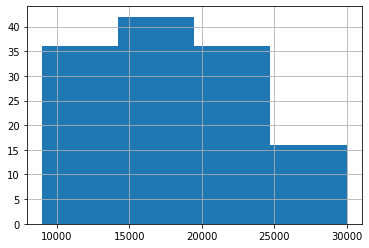

In [ ]:
fl['rent'].hist(bins=4)

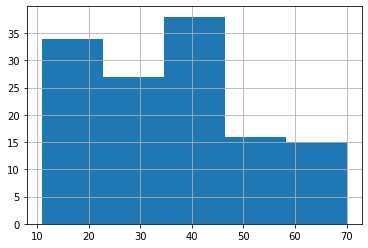

In [ ]:
fl['s'].hist(bins=5)

# Описательные статистики

In [ ]:
fl.drop(['walls','district'],axis=1).describe()
# fl.drop(['walls','floor','district'],axis=1).describe()

,rent,s,floor,rooms
count,130.000000,130.000000,130.000000,130.000000
mean,17859.615385,36.439231,4.153846,1.376923
std,5552.428396,15.753831,2.680569,0.613358
min,9000.000000,11.000000,1.000000,1.000000
25%,13500.000000,21.250000,2.000000,1.000000
50%,18000.000000,36.000000,3.000000,1.000000
75%,21000.000000,45.000000,5.000000,2.000000
max,30000.000000,70.000000,12.000000,3.000000


In [ ]:
fl[['rent','s']].mean() # среднее

rent    17859.615385
s          36.439231
dtype: float64

In [ ]:
fl[['rent','s']].std()  # средне квадратическое отклонение

rent    5552.428396
s         15.753831
dtype: float64

In [ ]:
fl[['rent','s']].skew() # коэффициент асимметрии

rent    0.513098
s       0.328439
dtype: float64

In [ ]:
fl[['rent','s']].kurtosis() # коэффициент эксцесса

rent   -0.374033
s      -0.706654
dtype: float64

## Проверка нормальности по критерию Шапиро-Уилка

H0 - данные не противоречат нормальному распределению (p-value > 0,05).Делаем вывод о том, что выборка подчиняется закону нормального распределения.

In [ ]:
import scipy.stats as stats
stats.shapiro(fl['rent'])

(0.9528542160987854, 0.0001889327832031995)

In [ ]:
stats.shapiro(fl['s'])

(0.9606573581695557, 0.0008220375748351216)

## Анализ влияния категориальных признаков. Критерии сравнения групп

In [ ]:
fl.groupby('walls')[['rent']].mean()

,rent
walls,
0,18573.863636
1,17494.186047


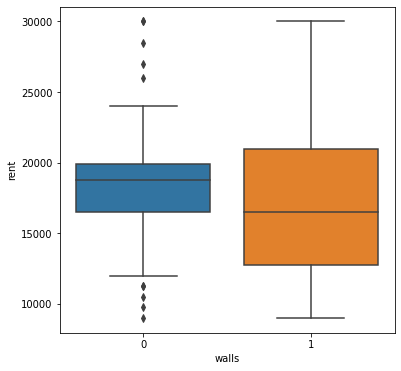

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='walls', y='rent', data=fl)

In [ ]:
fl_0 = fl[fl['walls']==0]
fl_1 = fl[fl['walls']==1]
scipy.stats.mannwhitneyu(fl_0['rent'],fl_1['rent'])

MannwhitneyuResult(statistic=2184.5, pvalue=0.14946852885961873)

In [ ]:
fl.groupby('district')[['rent']].mean()

,rent
district,
1,18970.588235
2,16410.714286
3,16085.526316
4,20200.000000


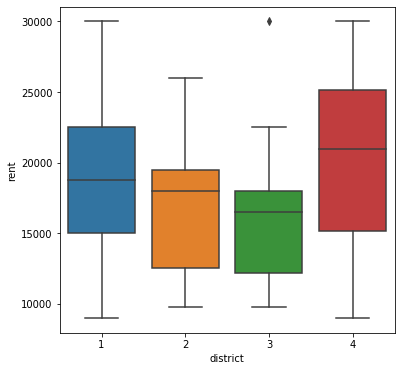

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='district', y='rent', data=fl)

In [ ]:
fl.loc[(fl['rent'] == 30000) & (fl['district'] == 3)]

,rent,s,floor,rooms,walls,district
43,30000,64.0,3,3,0,3


In [ ]:
fl=fl.drop(fl.index[[43]])

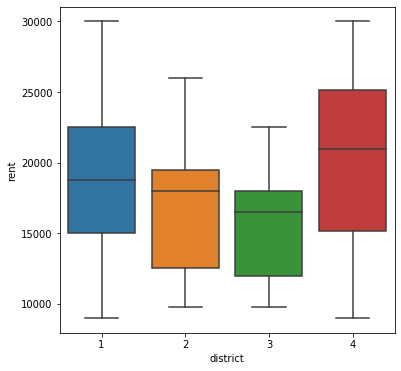

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='district', y='rent', data=fl)

In [ ]:
fld1=np.array(fl[fl['district']==1]['rent'])
fld2=np.array(fl[fl['district']==2]['rent'])
fld3=np.array(fl[fl['district']==3]['rent'])
fld4=np.array(fl[fl['district']==4]['rent'])
stats.mstats.kruskalwallis(fld1,fld2,fld3,fld4)

KruskalResult(statistic=11.157251714827014, pvalue=0.01090524797401684)

Тест Крускала-Уоллиса является непараметрической версией одностороннего дисперсионного анализа или ANOVA для краткости. Он назван в честь разработчиков метода Уильяма Крускала и Уилсона Уоллиса. Этот тест можно использовать для определения того, имеют ли более двух независимых выборок различное распределение.

In [ ]:
wd=pd.crosstab(fl['walls'],fl['district']); wd

district,1,2,3,4
walls,,,,
0,7,16,13,7
1,27,12,24,23


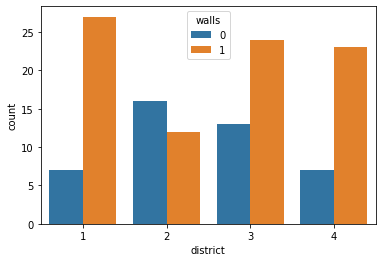

In [ ]:
sns.countplot(x=fl['district'], hue=fl['walls']);

In [ ]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(wd)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format( chi2, df, prob))

test Statistics: 11.032205314558254
degrees of freedom: 3
p-value: 0.011552997828290511



## Анализ влияния количественных и порядковых признаков

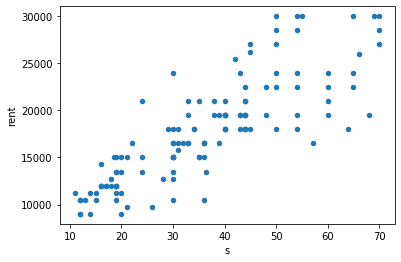

In [ ]:
fl.plot('s','rent',kind="scatter")

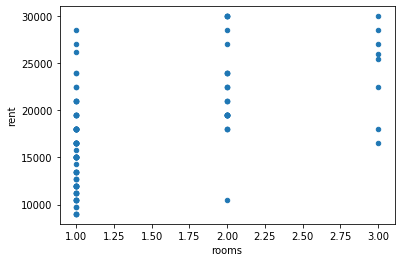

In [ ]:
fl.plot('rooms','rent',kind="scatter")

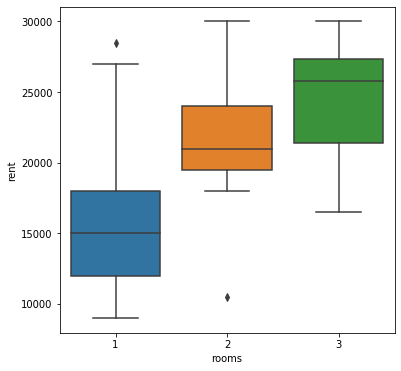

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='rooms', y='rent', data=fl)

In [ ]:
fl[['rent','s','rooms']].corr(method='pearson') # количественная корреляция Пирсона

,rent,s,rooms
rent,1.000000,0.827200,0.583461
s,0.827200,1.000000,0.730449
rooms,0.583461,0.730449,1.000000


In [ ]:
fl[['rent','s','rooms']].corr() # то же самое

,rent,s,rooms
rent,1.000000,0.827200,0.583461
s,0.827200,1.000000,0.730449
rooms,0.583461,0.730449,1.000000


In [ ]:
fl[['rent','s','floor','rooms']].corr(method='spearman') # ранговая корреляция Спирмена

,rent,s,floor,rooms
rent,1.000000,0.856358,0.382575,0.596947
s,0.856358,1.000000,0.413951,0.715424
floor,0.382575,0.413951,1.000000,0.158063
rooms,0.596947,0.715424,0.158063,1.000000


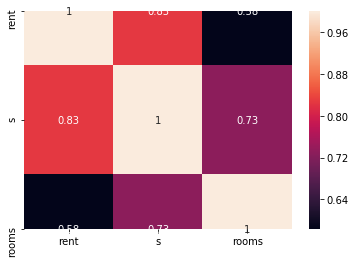

In [ ]:
num = ['rent', 's', 'rooms']
hm = sns.heatmap(fl[num].corr(),annot=True)

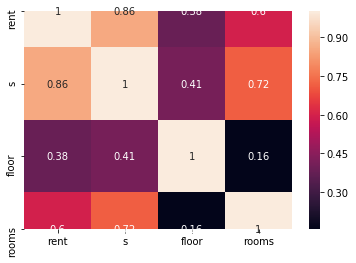

In [ ]:
ran = ['rent', 's','floor' ,'rooms']
hm = sns.heatmap(fl[ran].corr(method = 'spearman'), annot=True)

In [ ]:
scipy.stats.pearsonr(fl.rent, fl.s)

(0.8271996590334437, 1.3725432106740621e-33)

In [ ]:
scipy.stats.pearsonr(fl.rent, fl.rooms)

(0.583460601596746, 3.981954505934663e-13)

In [ ]:
scipy.stats.spearmanr(fl.rent, fl.floor)

SpearmanrResult(correlation=0.38257466966726855, pvalue=7.664508329769004e-06)

In [ ]:
scipy.stats.pearsonr(fl.s, fl.rooms)

(0.730448615928305, 8.943660271030319e-23)

## Парная регресия

In [ ]:
#sns.set(style="darkgrid")
sns.jointplot('s', 'rent', data=fl, kind="reg")

In [ ]:
LR = lm.LinearRegression()

In [ ]:
mod1 = LR.fit(fl[['s']],fl[['rent']])

In [ ]:
mod1.intercept_, mod1.coef_

In [ ]:
r2 = mod1.score(fl[['s']],fl[['rent']])
r2

# Парная регрессия (OLS). Классический подход.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
results1 = smf.ols('rent ~ s', data=fl).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     275.2
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           1.37e-33
Time:                        14:48:38   Log-Likelihood:                -1218.5
No. Observations:                 129   AIC:                             2441.
Df Residuals:                     127   BIC:                             2447.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7277.0311    688.099     10.576      0.000    5915.406    8638.656
s            289.5322     17.452     16.590      0.000     254.997     324.067
==============================================================================
Omnibus:                        4.947   Durbin-Watson:                   2.218
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                5.017
Skew:                           0.287   Prob(JB):                       0.0814
Kurtosis:                       3.776   Cond. No.                         99.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# МНОЖЕСТВЕННАЯ РЕГРЕССИЯ

In [ ]:
X=fl[['s','floor','rooms','walls']]

In [ ]:
X

,s,floor,rooms,walls
0,50.0,5,2,1
1,15.0,1,1,0
2,69.0,2,2,1
3,39.0,12,1,0
...,...,...,...,...
126,60.0,5,3,1
127,36.0,7,1,0
128,17.0,3,1,1
129,29.0,4,1,1


In [ ]:
mod_m = LR.fit(X,fl[['rent']])

In [ ]:
mod_m.intercept_, mod_m.coef_

(array([6111.64470966]),
 array([[ 301.79119816,   30.73003261, -207.5777708 , 1314.87261025]]))

In [ ]:
r2 = mod_m.score(X,fl[['rent']])
r2

0.6972687578441702

In [ ]:
x_new_fl = [[54,5,2,1]]

In [ ]:
y_new_fl=mod_m.predict(x_new_fl)
print("Прогноз цены: ",y_new_fl.round(0))

Прогноз цены:  [[23462.]]


Множественная регрессия (OLS)

In [ ]:
resultsm = smf.ols('rent ~ s + floor + rooms + walls', data=fl).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     71.40
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           2.96e-31
Time:                        14:48:43   Log-Likelihood:                -1215.8
No. Observations:                 129   AIC:                             2442.
Df Residuals:                     124   BIC:                             2456.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6111.6447    954.546      6.403      0.000    4222.331    8000.959
s            301.7912     28.129     10.729      0.000     246.115     357.467
floor         30.7300    113.726      0.270      0.787    -194.365     255.825
rooms       -207.5778    682.800     -0.304      0.762   -1559.031    1143.875
walls       1314.8726    591.155      2.224      0.028     144.811    2484.934
==============================================================================
Omnibus:                        1.598   Durbin-Watson:                   2.352
Prob(Omnibus):                  0.450   Jarque-Bera (JB):                1.128
Skew:                           0.131   Prob(JB):                        0.569
Kurtosis:                       3.376   Cond. No.                         159.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Комментарий:

Этаж и количество комнат оказались незначимыми параметрами!!!

In [ ]:
resultsm = smf.ols('rent ~ s + walls', data=fl).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     144.7
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           2.26e-33
Time:                        14:48:44   Log-Likelihood:                -1215.9
No. Observations:                 129   AIC:                             2438.
Df Residuals:                     126   BIC:                             2446.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6080.1311    857.026      7.094      0.000    4384.102    7776.160
s            298.2272     17.591     16.954      0.000     263.416     333.038
walls       1322.8790    580.787      2.278      0.024     173.518    2472.240
==============================================================================
Omnibus:                        1.383   Durbin-Watson:                   2.346
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                0.928
Skew:                           0.100   Prob(JB):                        0.629
Kurtosis:                       3.364   Cond. No.                         140.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ВЛИЯНИЕ КАТЕГОРИАЛЬНЫХ ФАКТОРОВ. ONE HOT ENCODING. Dummy variables

In [ ]:
fl01 = pd.concat((fl,pd.get_dummies(fl.district, prefix="d", prefix_sep='',)),1)

In [ ]:
fl01

,rent,s,floor,rooms,walls,district,d1,d2,d3,d4
0,24000,50.0,5,2,1,1,1,0,0,0
1,11250,15.0,1,1,0,2,0,1,0,0
2,30000,69.0,2,2,1,1,1,0,0,0
3,19500,39.0,12,1,0,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
126,22500,60.0,5,3,1,3,0,0,1,0
127,16500,36.0,7,1,0,1,1,0,0,0
128,12000,17.0,3,1,1,3,0,0,1,0
129,18000,29.0,4,1,1,2,0,1,0,0


In [ ]:
resultsm = smf.ols('rent ~ s + walls + d1 + d2 + d3', data=fl01).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     79.26
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           8.55e-37
Time:                        14:48:47   Log-Likelihood:                -1199.9
No. Observations:                 129   AIC:                             2412.
Df Residuals:                     123   BIC:                             2429.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9061.2412    943.085      9.608      0.000    7194.463    1.09e+04
s            288.7570     15.988     18.061      0.000     257.110     320.404
walls        756.3623    548.379      1.379      0.170    -329.120    1841.845
d1         -1927.3381    681.554     -2.828      0.005   -3276.432    -578.244
d2         -3014.1444    739.580     -4.075      0.000   -4478.097   -1550.192
d3         -3828.7048    671.753     -5.700      0.000   -5158.399   -2499.011
==============================================================================
Omnibus:                        1.865   Durbin-Watson:                   2.462
Prob(Omnibus):                  0.394   Jarque-Bera (JB):                1.751
Skew:                          -0.284   Prob(JB):                        0.417
Kurtosis:                       2.935   Cond. No.                         204.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
wd=pd.crosstab(fl01['walls'],fl01['district']); wd

district,1,2,3,4
walls,,,,
0,7,16,13,7
1,27,12,24,23


In [ ]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(wd)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format( chi2, df, prob))

test Statistics: 11.032205314558254
degrees of freedom: 3
p-value: 0.011552997828290511



In [ ]:
resultsm = smf.ols('rent ~ s + d1 + d2 + d3 ', data=fl01).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     97.88
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           2.06e-37
Time:                        14:48:49   Log-Likelihood:                -1200.9
No. Observations:                 129   AIC:                             2412.
Df Residuals:                     124   BIC:                             2426.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9846.3637    754.652     13.048      0.000    8352.696    1.13e+04
s            283.1441     15.517     18.247      0.000     252.431     313.857
d1         -1893.4125    683.583     -2.770      0.006   -3246.416    -540.409
d2         -3279.9634    716.621     -4.577      0.000   -4698.357   -1861.570
d3         -3929.0989    670.223     -5.862      0.000   -5255.659   -2602.539
==============================================================================
Omnibus:                        0.930   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.817
Skew:                          -0.194   Prob(JB):                        0.665
Kurtosis:                       2.970   Cond. No.                         184.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_new_fl = pd.array([1,40,1,0,0]) # Первая единица на Intercept

In [ ]:
rp=resultsm.params; rp

Intercept    9846.363682
s             283.144111
d1          -1893.412464
d2          -3279.963391
d3          -3929.098930
dtype: float64

In [ ]:
y_new_fl=np.dot(rp,x_new_fl) # скалярное произведение векторов
print('Прогноз цены:',y_new_fl.round(2))

Прогноз цены: 19278.72


Другой, более простой способ обработки категориальных данных в помощью функции smf.ols

In [ ]:
resultsm = smf.ols('rent ~ s + walls + C(district)', data=fl01).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     79.26
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           8.55e-37
Time:                        14:48:52   Log-Likelihood:                -1199.9
No. Observations:                 129   AIC:                             2412.
Df Residuals:                     123   BIC:                             2429.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         7133.9031    965.099      7.392      0.000    5223.549    9044.257
C(district)[T.2] -1086.8062    729.029     -1.491      0.139   -2529.874     356.262
C(district)[T.3] -1901.3667    655.792     -2.899      0.004   -3199.467    -603.267
C(district)[T.4]  1927.3381    681.554      2.828      0.005     578.244    3276.432
s                  288.7570     15.988     18.061      0.000     257.110     320.404
walls              756.3623    548.379      1.379      0.170    -329.120    1841.845
==============================================================================
Omnibus:                        1.865   Durbin-Watson:                   2.462
Prob(Omnibus):                  0.394   Jarque-Bera (JB):                1.751
Skew:                          -0.284   Prob(JB):                        0.417
Kurtosis:                       2.935   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
resultsm = smf.ols('rent ~ s + walls + C(district)', data=fl01).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     79.26
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           8.55e-37
Time:                        14:48:53   Log-Likelihood:                -1199.9
No. Observations:                 129   AIC:                             2412.
Df Residuals:                     123   BIC:                             2429.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         7133.9031    965.099      7.392      0.000    5223.549    9044.257
C(district)[T.2] -1086.8062    729.029     -1.491      0.139   -2529.874     356.262
C(district)[T.3] -1901.3667    655.792     -2.899      0.004   -3199.467    -603.267
C(district)[T.4]  1927.3381    681.554      2.828      0.005     578.244    3276.432
s                  288.7570     15.988     18.061      0.000     257.110     320.404
walls              756.3623    548.379      1.379      0.170    -329.120    1841.845
==============================================================================
Omnibus:                        1.865   Durbin-Watson:                   2.462
Prob(Omnibus):                  0.394   Jarque-Bera (JB):                1.751
Skew:                          -0.284   Prob(JB):                        0.417
Kurtosis:                       2.935   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from patsy.contrasts import Treatment

In [ ]:
resultsm = smf.ols('rent ~ s + walls + C(district, Treatment(reference=4))', data=fl01).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     79.26
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           8.55e-37
Time:                        14:48:54   Log-Likelihood:                -1199.9
No. Observations:                 129   AIC:                             2412.
Df Residuals:                     123   BIC:                             2429.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 9061.2412    943.085      9.608      0.000    7194.463    1.09e+04
C(district, Treatment(reference=4))[T.1] -1927.3381    681.554     -2.828      0.005   -3276.432    -578.244
C(district, Treatment(reference=4))[T.2] -3014.1444    739.580     -4.075      0.000   -4478.097   -1550.192
C(district, Treatment(reference=4))[T.3] -3828.7048    671.753     -5.700      0.000   -5158.399   -2499.011
s                                          288.7570     15.988     18.061      0.000     257.110     320.404
walls                                      756.3623    548.379      1.379      0.170    -329.120    1841.845
==============================================================================
Omnibus:                        1.865   Durbin-Watson:                   2.462
Prob(Omnibus):                  0.394   Jarque-Bera (JB):                1.751
Skew:                          -0.284   Prob(JB):                        0.417
Kurtosis:                       2.935   Cond. No.                         204.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Убедимся, что комнаты все-таки влияют на арендную плату

In [ ]:
results2 = smf.ols('rent ~ rooms', data=fl01).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     65.55
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           3.98e-13
Time:                        14:48:55   Log-Likelihood:                -1266.0
No. Observations:                 129   AIC:                             2536.
Df Residuals:                     127   BIC:                             2542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.049e+04    980.252     10.705      0.000    8553.752    1.24e+04
rooms       5330.0524    658.339      8.096      0.000    4027.318    6632.787
==============================================================================
Omnibus:                        4.464   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                4.065
Skew:                           0.428   Prob(JB):                        0.131
Kurtosis:                       3.149   Cond. No.                         5.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""